# 2020 US Democrats

In [1]:
from my_weapon import *
plt.style.use('fivethirtyeight')

In [58]:
%ll disk/users-face/

total 475552
-rw-rw-r-- 1 alex    191105 Feb 25 05:32 2020-02-14-2020-02-24-error.lj
-rw-rw-r-- 1 alex  24851275 Feb 25 05:32 2020-02-14-2020-02-24.lj
-rw-rw-r-- 1 alex   8921088 Feb 25 01:04 2020-02-15-error.lj
-rw-rw-r-- 1 alex 210572363 Feb 25 01:00 2020-02-15.lj
-rw-rw-r-- 1 alex 235423638 Feb 25 05:33 2020-02-24.lj
-rw-rw-r-- 1 alex   5854031 Feb 17 15:28 noFace.lj
-rw-rw-r-- 1 alex   1120146 Feb 25 05:32 noFace.txt


## Loading faces

In [75]:
users = []

for line in tqdm(open("disk/users-face/2020-02-24.lj")):
    d = json.loads(line.strip())
    face = d["faces"][0]
    # print(face)
    age = face['attributes']["age"]["value"]
    gender = face['attributes']["gender"]["value"]

    if age < 18:
        continue
    elif age >= 18 and age < 30:
        age_range = ">=18, <30"
    elif age >= 30 and age < 50:
        age_range = ">=30, <50"
    elif age >= 50 and age < 65:
        age_range = ">=50, <65"
    elif age >= 65:
        age_range = ">=65"

    users.append({"uid": d["id"], 
                  "age": age, 
                  "gender": gender, 
                  "age_range": age_range}
                )
        
users = pd.DataFrame(users).set_index("uid")
users = users[~users.index.duplicated(keep='first')]

224880it [00:02, 79022.14it/s]


In [76]:
len(users)

223161

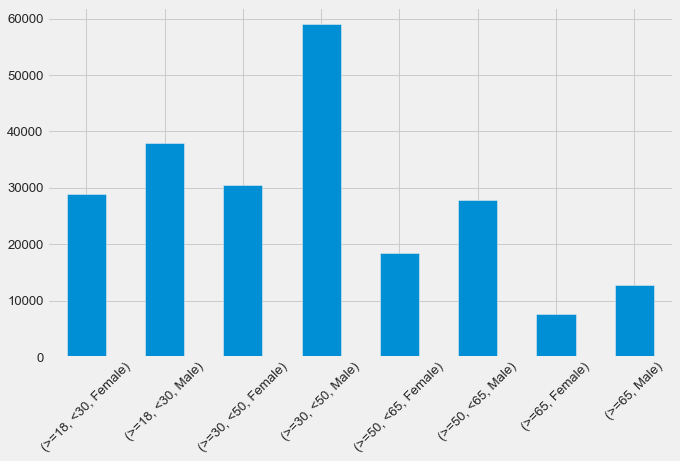

In [77]:
groups = users.groupby(["age_range", "gender"]).size()
groups

sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
groups.plot.bar()
plt.xlabel("")
plt.xticks(rotation=45)
plt.savefig("../Argentina_election/web/static/us2020_twitter_population_0224.png",
            bbox_inches = 'tight', dpi=300)

In [5]:
m_18, f_18 = 0, 0
m_30, f_30 = 0, 0
m_50, f_50 = 0, 0
m_65, f_65 = 0, 0

for row in tqdm(users.itertuples()):
    if row.gender == "Male":
        if row.age >= 18 and row.age < 30:
            m_18 += 1
        elif row.age >= 30 and row.age < 50:
            m_30 += 1
        elif row.age >= 50 and row.age < 65:
            m_50 += 1
        elif row.age >= 65:
            m_65 += 1
    elif row.gender == "Female":
        if row.age >= 18 and row.age < 30:
            f_18 += 1
        elif row.age >= 30 and row.age < 50:
            f_30 += 1
        elif row.age >= 50 and row.age < 65:
            f_50 += 1
        elif row.age >= 65:
            f_65 += 1
            
age_gender_dist = {
    "category": [
        "female 18-29", "male 18-29", 
        "female 30-49", "male 30-49", 
        "female 50-64", "male 50-64", 
        "female >=65", "male >=65",
    ],
    "n": [
              f_18, m_18, 
              f_30, m_30, 
              f_50, m_50, 
              f_65, m_65,
         ]
}
age_gender_dist = pd.DataFrame(age_gender_dist).set_index("category")
age_gender_dist["percent"] = age_gender_dist / age_gender_dist.sum()

223161it [00:00, 771753.54it/s]


## Census

In [65]:
data = pd.read_csv("data/US_age_sex.csv")
data

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV,POPEST2017_CIV,POPEST2018_CIV
0,10,0,0,0,United States,0,0,3944160,3951430,3963092,3926570,3931258,3954786,3983965,3955192,3893945,3848208
1,10,0,0,0,United States,0,1,3978090,3957730,3966225,3977550,3942696,3948892,3973192,4003594,3973803,3912900
2,10,0,0,0,United States,0,2,4096939,4090621,3970654,3978924,3991745,3958708,3966330,3991543,4020825,3991437
3,10,0,0,0,United States,0,3,4119051,4111688,4101644,3981532,3991019,4005932,3974354,3982719,4006802,4036562
4,10,0,0,0,United States,0,4,4063186,4077346,4121488,4111490,3992496,4004035,4020264,3989317,3996592,4021168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,40,4,8,56,Wyoming,2,82,1103,1103,1107,1084,1106,1105,1035,1090,1134,1122
13568,40,4,8,56,Wyoming,2,83,911,936,1028,1035,1002,1030,1031,953,1026,1057
13569,40,4,8,56,Wyoming,2,84,894,883,880,1011,988,945,973,974,919,985
13570,40,4,8,56,Wyoming,2,85,5624,5644,5730,5853,6051,6257,6368,6535,6672,6680


In [66]:
data.NAME.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [67]:
for state in data.NAME.unique():
    print(state)
    cen = data[data["NAME"]==state]
    cen = {
        "category": ["female 18-29",
                     "male 18-29", 
                     "female 30-49",
                     "male 30-49", 
                     "female 50-64",
                     "male 50-64", 
                     "female >=65", 
                     "male >=65", ],
        "n": [
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 18) & (cen.AGE < 30)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 18) & (cen.AGE < 30)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 30) & (cen.AGE < 50)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 30) & (cen.AGE < 50)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 50) & (cen.AGE < 65)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 50) & (cen.AGE < 65)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 65) & (cen.AGE < 100)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 65) & (cen.AGE < 100)]["POPEST2018_CIV"]),
            ]
    }
    cen = pd.DataFrame(cen).set_index("category")
    cen["percent"] = cen / cen.sum()
#     cen
    cen.to_csv(f"data/census/{state}.csv")
    
    plt.figure(figsize=(10, 6))
    cen["percent"].plot.bar()
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.title(f"Distribution of population from Census ({state})")
    plt.savefig(f"fig/us_census_{state}.png", dpi=300, bbox_inches = 'tight')
    plt.close()

United States
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [85]:
num2label = {0: "Pete Buttigieg", 
             1: "Bernie Sanders", 
             2: "Elizabeth Warren", 
             3: "Joe Biden", 
             4: "Others",
             5: "Mike Bloomberg"}

def making_pickle_file(csv_file, pickle_file):
    users = pd.read_csv(csv_file).set_index("uid").T.to_dict()
    _users = []
    for u, v in users.items():
        _v = np.array([v["0"], v["1"], v["2"], v["3"], v["4"], v["5"]])
        camp = num2label[_v.argmax()]
        
        _users.append({
            "uid": u,
            "Camp": camp
        })
    print("# of users:", len(_users))
    pd.DataFrame(_users).set_index("uid").to_pickle(pickle_file)
    
making_pickle_file("disk/users-14days/2020-02-03.csv",
                   "disk/users-pickle/14days-2020-02-03.pl")

# of users: 1138494


In [86]:
# making_pickle_file("disk/users-14days/2020-02-11.csv",
#                    "disk/users-pickle/14days-2020-02-11.pl")

# making_pickle_file("disk/users-14days/2020-02-22.csv",
#                    "disk/users-pickle/14days-2020-02-22.pl")

making_pickle_file("disk/users-14days/2020-02-24.csv",
                   "disk/users-pickle/14days-2020-02-24.pl")

# of users: 1759780


In [103]:
# join the opinions
# users_opinion = pd.read_pickle("disk/users-pickle/14days-2020-02-03.pl")
users_opinion = pd.read_pickle("disk/users-pickle/14days-2020-02-22.pl")

In [104]:
print("N of classified users:", len(users_opinion))
print("% of users supporting BS:", float(users_opinion[users_opinion["Camp"] == "Bernie Sanders"].count() / users_opinion.count()) * 100)

N of classified users: 1711650
% of users supporting BS: 32.65083399059387


In [105]:
users_v2 = users.join(users_opinion, how="inner")
print(users_v2)
print("N of classified users with age, gender:", len(users_v2))
print("% of users supporting Clinton:", len(users_v2[users_v2["Camp"] == "Bernie Sanders"]) / len(users_v2) * 100)
print("% of users supporting Others:", len(users_v2[users_v2["Camp"] == "Others"]) / len(users_v2) * 100)

                     age  gender  age_range              Camp
uid                                                          
1230079565231468544   47  Female  >=30, <50         Joe Biden
2821590472            55    Male  >=50, <65    Mike Bloomberg
250874674             59  Female  >=50, <65  Elizabeth Warren
4872173855            30  Female  >=30, <50  Elizabeth Warren
1230931877420097536   65  Female       >=65  Elizabeth Warren
...                  ...     ...        ...               ...
556661091             39    Male  >=30, <50    Bernie Sanders
778365522             57  Female  >=50, <65  Elizabeth Warren
65772802              29    Male  >=18, <30  Elizabeth Warren
932444526             52    Male  >=50, <65    Bernie Sanders
228046685             23    Male  >=18, <30  Elizabeth Warren

[141396 rows x 4 columns]
N of classified users with age, gender: 141396
% of users supporting Clinton: 32.2894565617132
% of users supporting Others: 3.238422586211774


In [106]:
groups = users_v2.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders       4928
                   Elizabeth Warren     4466
                   Joe Biden            1146
                   Mike Bloomberg       3434
                   Others                483
                   Pete Buttigieg       2632
           Male    Bernie Sanders       7799
                   Elizabeth Warren     3714
                   Joe Biden            1458
                   Mike Bloomberg       4615
                   Others                736
                   Pete Buttigieg       3109
>=30, <50  Female  Bernie Sanders       5526
                   Elizabeth Warren     5624
                   Joe Biden            1898
                   Mike Bloomberg       3849
                   Others                677
                   Pete Buttigieg       2621
           Male    Bernie Sanders      12542
                   Elizabeth Warren     6261
                   Joe Biden            3443
                   

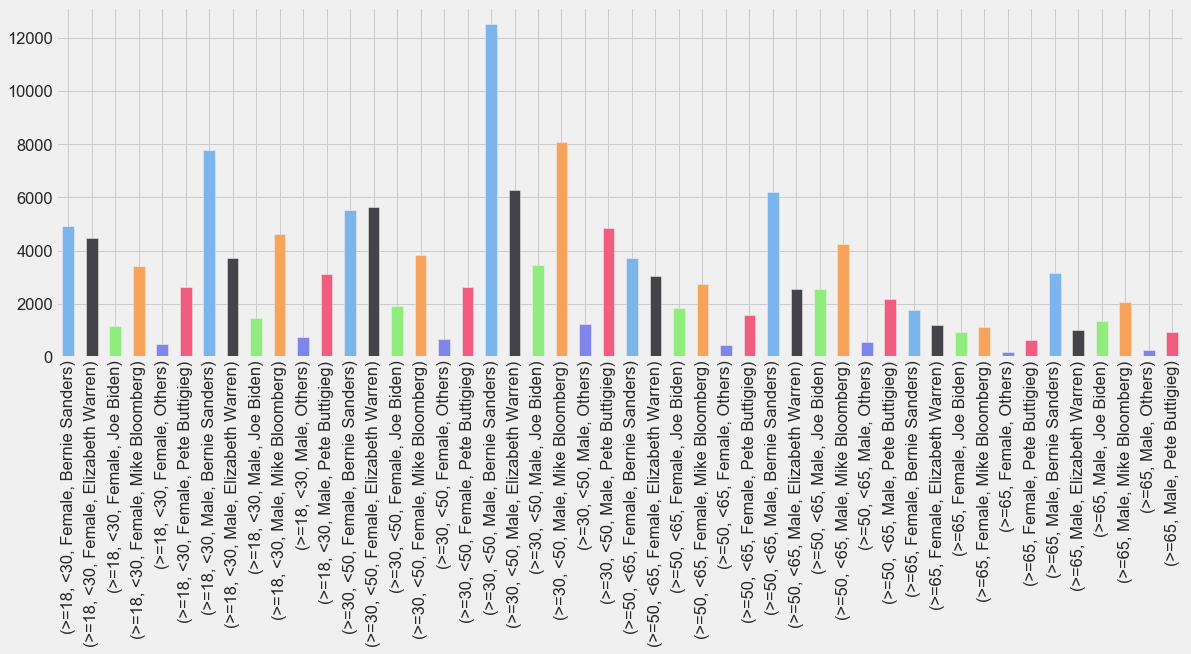

In [107]:
colors = [
'#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', '#f15c80', 
]

sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 6))
groups.plot.bar(color=colors)
plt.xlabel("")
plt.savefig("../Argentina_election/web/static/US2020_age_gender_0222.png", bbox_inches = 'tight', dpi=300)

In [87]:
# cen = pd.read_csv("data/census/United States.csv").set_index("category")
# print(cen, "\n")
# print("After reweighting!")

# camps = [
#      "Pete Buttigieg", 
#      "Bernie Sanders", 
#      "Elizabeth Warren", 
#      "Joe Biden", 
#      "Others",
#      "Mike Bloomberg"
# ]
# w = cen.percent.to_list()

# for _camp in camps:
#     r = groups[">=18, <30"]["Female"][_camp] / sum(groups[">=18, <30"]["Female"]) * w[0] \
#     + groups[">=18, <30"]["Male"][_camp] / sum(groups[">=18, <30"]["Male"]) * w[1] \
#     + groups[">=30, <50"]["Female"][_camp] / sum(groups[">=30, <50"]["Female"]) * w[2] \
#     + groups[">=30, <50"]["Male"][_camp] / sum(groups[">=30, <50"]["Male"]) * w[3] \
#     + groups[">=50, <65"]["Female"][_camp] / sum(groups[">=50, <65"]["Female"]) * w[4] \
#     + groups[">=50, <65"]["Male"][_camp] / sum(groups[">=50, <65"]["Male"]) * w[5] \
#     + groups[">=65"]["Female"][_camp] / sum(groups[">=65"]["Female"]) * w[6] \
#     + groups[">=65"]["Male"][_camp] / sum(groups[">=65"]["Male"]) * w[7]
#     print(_camp, round(r, 3))

rescale_opinion("14days-2020-02-24", "United States", "US")

                     n   percent
category                        
female 18-29  26284520  0.104063
male 18-29    27033898  0.107030
female 30-49  42044603  0.166459
male 30-49    41650645  0.164899
female 50-64  32477860  0.128583
male 50-64    30659675  0.121385
female >=65   29124375  0.115306
male >=65     23306818  0.092274 

After reweighting!
age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      2906
                   Elizabeth Warren    2786
                   Joe Biden            521
                   Mike Bloomberg      1957
                   Others               280
                   Pete Buttigieg      1622
           Male    Bernie Sanders      4576
                   Elizabeth Warren    2219
                   Joe Biden            639
                   Mike Bloomberg      2564
                   Others               384
                   Pete Buttigieg      1904
>=30, <50  Female  Bernie Sanders      3578
                   Elizabeth Warren    37

# Add location (states)

In [108]:
users_state = pd.read_csv("disk/users-location/2020-02-24.csv", 
                          usecols=["uid","state"],
                          error_bad_lines=False).set_index("uid").dropna()

In [109]:
users_state

,state
uid,
15715866,CO
1230079565231468544,NC
156646186,CO
774759130028314624,CO
25758126,AZ
...,...
734797636746805248,PA
1047514137134338048,NC
35620940,OH


In [110]:
users_v3 = users_v2.join(users_state, how="inner")
users_v3

,age,gender,age_range,Camp,state
uid,,,,,
1230079565231468544,47,Female,">=30, <50",Joe Biden,NC
2821590472,55,Male,">=50, <65",Mike Bloomberg,NY
4872173855,30,Female,">=30, <50",Elizabeth Warren,VA
1230931877420097536,65,Female,>=65,Elizabeth Warren,AZ
1118644273,23,Male,">=18, <30",Elizabeth Warren,CO
...,...,...,...,...,...
15783028,29,Female,">=18, <30",Joe Biden,FL
335333983,66,Female,>=65,Joe Biden,NY
778365522,57,Female,">=50, <65",Elizabeth Warren,NY


In [30]:
states = ['CA', 'TX', 'NY', 'FL', 'IL', 'GA', 'PA', 'OH', 'DC', 'NC', 'MI', 'MA',
       'IN', 'NJ', 'VA', 'AZ', 'TN', 'WA', 'MD', 'CO', 'MO', 'KY', 'LA', 'MN',
       'OR', 'AL', 'SC', 'NV', 'OK', 'WI', 'IA', 'CT', 'KS', 'AR', 'UT', 'MS',
       'WV', 'NE', 'NM', 'HI', 'NH', 'RI', 'ME', 'ID', 'AK', 'DE', 'MT', 'SD',
       'ND', 'VT', 'WY']

In [ ]:
users_v3.Camp.value_counts()

In [35]:
users_tmp = users_v3[users_v3.state=="NV"]

In [36]:
users_tmp.Camp.value_counts()

Bernie Sanders      323
Elizabeth Warren    172
Mike Bloomberg      152
Pete Buttigieg      128
Joe Biden           125
Others               47
Name: Camp, dtype: int64

In [37]:
groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      29
                   Elizabeth Warren    27
                   Joe Biden            8
                   Mike Bloomberg      17
                   Others               8
                   Pete Buttigieg      26
           Male    Bernie Sanders      52
                   Elizabeth Warren    24
                   Joe Biden            9
                   Mike Bloomberg      11
                   Others               5
                   Pete Buttigieg      15
>=30, <50  Female  Bernie Sanders      36
                   Elizabeth Warren    25
                   Joe Biden           18
                   Mike Bloomberg      26
                   Others               8
                   Pete Buttigieg      23
           Male    Bernie Sanders      98
                   Elizabeth Warren    40
                   Joe Biden           33
                   Mike Bloomberg      40
                   Others              1

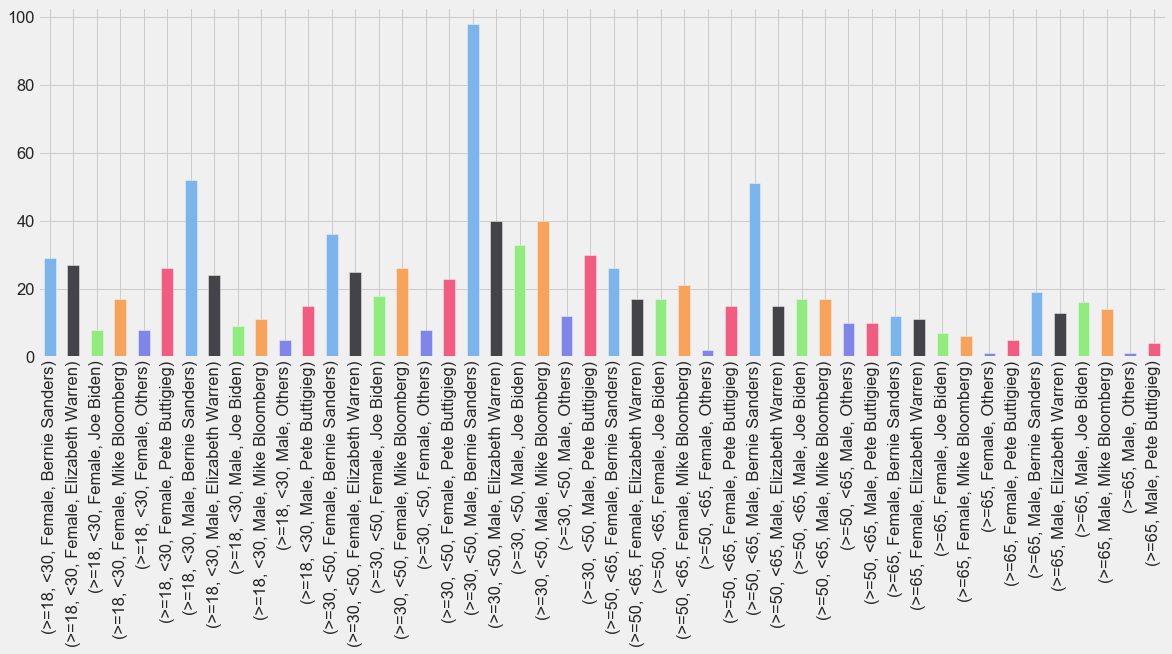

In [38]:
colors = [
'#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', '#f15c80', 
]
sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 6))
groups.plot.bar(color=colors)
plt.xlabel("")
plt.savefig("../Argentina_election/web/static/US2020_age_gender_NV_0222.png", bbox_inches = 'tight', dpi=300)

In [112]:
sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')

for _state in states:
    print(_state)
    users_tmp = users_v3[users_v3.state==_state]
    colors = [
        '#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', '#f15c80', 
    ]
    groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
    plt.figure(figsize=(18, 6))
    groups.plot.bar(color=colors)
    plt.xlabel("")
    plt.savefig(f"../Argentina_election/web/static/US2020_age_gender_{_state}_0222.png", 
                bbox_inches = 'tight')
    plt.close()

CA
TX
NY
FL
IL
GA
PA
OH
DC
NC
MI
MA
IN
NJ
VA
AZ
TN
WA
MD
CO
MO
KY
LA
MN
OR
AL
SC
NV
OK
WI
IA
CT
KS
AR
UT
MS
WV
NE
NM
HI
NH
RI
ME
ID
AK
DE
MT
SD
ND
VT
WY


In [97]:
def rescale_opinion(opinion_file, census_file, state_name):
    # print(opinion_file, state_name)
    users_opinion = pd.read_pickle(f"disk/users-pickle/{opinion_file}.pl")
    users_v2 = users.join(users_opinion, how="inner")
    users_v3 = users_v2.join(users_state, how="inner")

    cen = pd.read_csv(f"data/census/{census_file}.csv").set_index("category")
#     cen = pd.read_csv("data/census/Iowa.csv").set_index("category")
    print(cen, "\n")
    print("After reweighting!")

    camps = [
         "Pete Buttigieg", 
         "Bernie Sanders", 
         "Elizabeth Warren", 
         "Joe Biden", 
         "Others",
         "Mike Bloomberg"
    ]

    if state_name != "US":
        users_tmp = users_v3[users_v3.state==state_name]
    else:
        users_tmp = users_v3
#     users_tmp = users_v3[users_v3.state=="NV"]
    groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
    print(groups)
    w = cen.percent.to_list()
    
    rsts = []
    for _camp in camps:
        r = groups[">=18, <30"]["Female"].get(_camp, 0) / sum(groups[">=18, <30"]["Female"]) * w[0] \
        + groups[">=18, <30"]["Male"].get(_camp, 0) / sum(groups[">=18, <30"]["Male"]) * w[1] \
        + groups[">=30, <50"]["Female"].get(_camp, 0) / sum(groups[">=30, <50"]["Female"]) * w[2] \
        + groups[">=30, <50"]["Male"].get(_camp, 0) / sum(groups[">=30, <50"]["Male"]) * w[3] \
        + groups[">=50, <65"]["Female"].get(_camp, 0) / sum(groups[">=50, <65"]["Female"]) * w[4] \
        + groups[">=50, <65"]["Male"].get(_camp, 0) / sum(groups[">=50, <65"]["Male"]) * w[5] \
        + groups[">=65"]["Female"].get(_camp, 0) / sum(groups[">=65"]["Female"]) * w[6] \
        + groups[">=65"]["Male"].get(_camp, 0) / sum(groups[">=65"]["Male"]) * w[7]
        print(_camp, round(r, 3))
        rsts.append(str(round(r, 3) * 100))
    
    print(opinion_file, state_name, ",".join(rsts), sep=",")
    no_mb = np.array([float(r) for r in rsts[:-1]])
    # print(no_mb)
    no_mb = no_mb / sum(no_mb) * 100
    no_mb = [str(round(r, 3)) for r in no_mb]
    
    print("No MB:", ",".join(no_mb))
    print("\n\n")

In [98]:
rescale_opinion("14days-2020-02-03", "Iowa", "IA")
rescale_opinion("14days-2020-02-11", "New Hampshire", "NH")
rescale_opinion("14days-2020-02-22", "Nevada", "NV")

                   n   percent
category                      
female 18-29  253420  0.104564
male 18-29    269347  0.111136
female 30-49  371259  0.153186
male 30-49    383258  0.158137
female 50-64  305509  0.126057
male 50-64    300954  0.124178
female >=65   297878  0.122908
male >=65     241952  0.099833 

After reweighting!
age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      14
                   Elizabeth Warren    19
                   Joe Biden            7
                   Mike Bloomberg       1
                   Others               4
                   Pete Buttigieg       5
           Male    Bernie Sanders      24
                   Elizabeth Warren    24
                   Joe Biden            9
                   Others               7
                   Pete Buttigieg       4
>=30, <50  Female  Bernie Sanders      22
                   Elizabeth Warren    14
                   Joe Biden           15
                   Others               2
   

In [99]:
rescale_opinion("14days-2020-02-24", "South Carolina", "SC")

                   n   percent
category                      
female 18-29  399758  0.101531
male 18-29    393880  0.100038
female 30-49  639887  0.162519
male 30-49    599699  0.152312
female 50-64  529973  0.134603
male 50-64    474202  0.120438
female >=65   499704  0.126915
male >=65     400211  0.101646 

After reweighting!
age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      26
                   Elizabeth Warren    26
                   Joe Biden            5
                   Mike Bloomberg      13
                   Others               3
                   Pete Buttigieg      16
           Male    Bernie Sanders      41
                   Elizabeth Warren    20
                   Joe Biden            9
                   Mike Bloomberg      23
                   Others              10
                   Pete Buttigieg      11
>=30, <50  Female  Bernie Sanders      47
                   Elizabeth Warren    37
                   Joe Biden           11
   

## !! Old codes: Added location (counties)

In [46]:
users_county = pd.read_csv("data/us-user-county.csv").set_index("uid")

In [47]:
users_v3 = users_opinion.join(users_county, on='uid')

In [48]:
users_v3 = users_v3.dropna()

In [37]:
county_users = {}
for row in tqdm(users_v3.itertuples()):
    if row.loc not in county_users:
        county_users[row.loc] = [0, 0]
    if row.Camp=="Clinton":
        county_users[row.loc][0] += 1
    elif row.Camp=="Trump":
        county_users[row.loc][1] += 1

In [38]:
county_users_gap = {}

for loc, v in county_users.items():
    # print(v[0] + v[1])
    if v[0] + v[1] > 0:
        county_users_gap[loc] = round(v[0] / (v[0] + v[1]) - v[1] / (v[0] + v[1]), 3)

In [25]:
county_users_gap = sorted(county_users_gap.items(), key=lambda d:d[1], reverse=True)

In [28]:
for loc, v in county_users_gap:
    print(loc, v, sep="\t", file=open("data/us-county-users-gap.txt", "w"))

In [39]:
original_data = json.load(open("data/us-counties-unemployment.json"))
for d in original_data:
    d['value'] = 0
    d["name"] = d["name"].replace(" County", "").replace(" Municipio", "")

In [40]:
# match
for d in original_data:
    if d['name'] in county_users_gap:
        d['value'] = county_users_gap[d["name"]]

In [44]:
final_data = []

for v in original_data:
    if v['value'] != 0:
        final_data.append(v)

In [45]:
json.dump(final_data, open("web/data/us-county-opinion.json", "w"), indent=2)